### **Logistic Regression**

Logistic Regression is a Supervised classification Algorithm used to predect catogorical values based on probablity of event

**Types of Logistic Regression**
1. Binary classification
2. Multiclass Classification

**Confusion Matrrix-** Confusion matrix is an n*n matrix used for evaluating performance of classification model
1. FN(FalseNegative) - Values which are positive but predected Negative also called as Type 2 Error , In Medical domian it should be low
2. FP(False Positive) - Values which are negative but predected Positive also called as Type 1 Error , In finance domain it should be low
3. TP(True Positive) - Value which are positive as well as predected positive
4. TN(True Negative) - values which are negative as well as predected negative 

**Classification Report**
1. Precision
2. Recall
3. F1 Score
4. Mean Accuracy


**OVR(One Vs Rest)-** IT is used to convert multiclass classification into Binary Classification

In [ ]:
**Precision-** TP/TP+FP
**Recall-** 

# **Diabeties Predection Model**

**Import Necessary Libraries**

In [4]:
import pandas as pd  # Data manipulation
import numpy as np   # Numerical Calculaations and Stastical Analysis
import seaborn as sns  # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
from sklearn.linear_model import LogisticRegression  # Importing Model
from sklearn.model_selection import train_test_split # Train-Test split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report  # Performance Analysis
from sklearn.metrics import roc_auc_score , roc_curve 

**Problem Statement-** Build a Model that can predect if a person has Diabeties or Not

In [6]:
df = pd.read_csv("diabetes_.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**EDA**

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

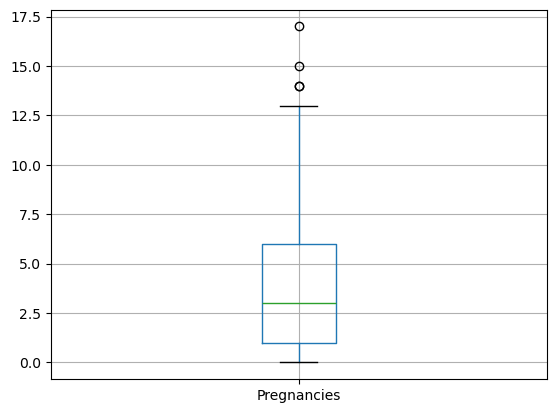

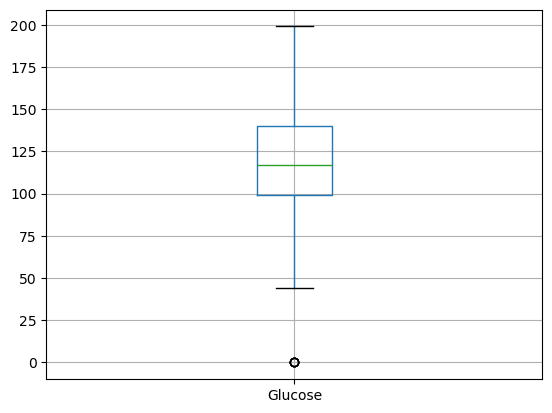

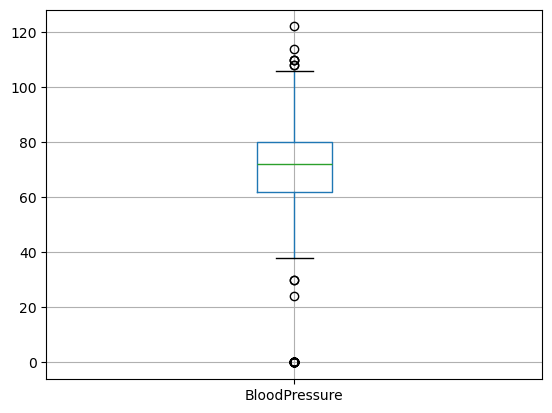

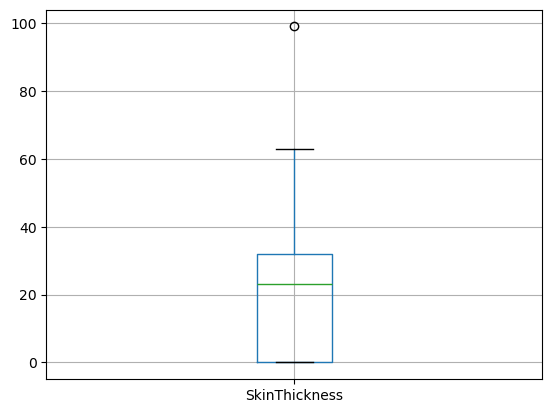

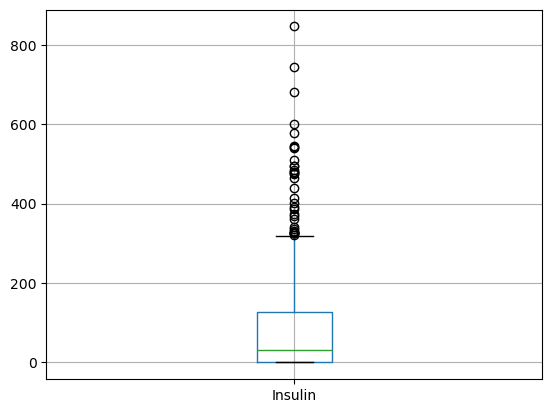

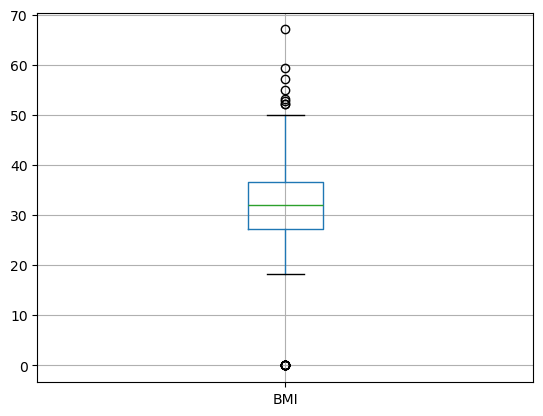

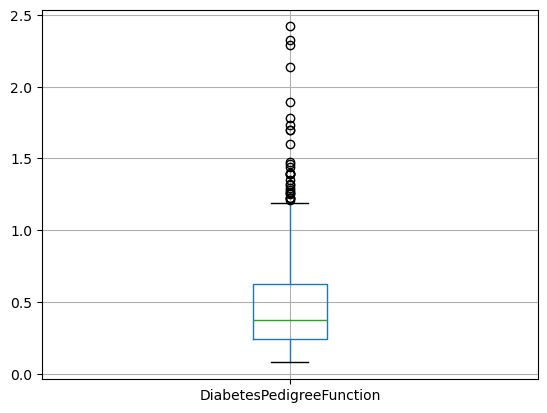

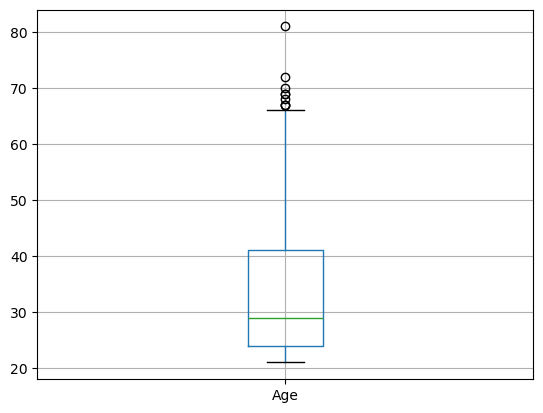

In [15]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']:
    df[[i]].boxplot()
    plt.show()

In [24]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [25]:
def RemoveOutliers(df,columns):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[cols].quantile(0.25)
        Q3 = df_clean[cols].quantile(0.25)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5*IQR
        upper = Q3 +1.5*IQR

        df_clean = df_clean[(df_clean[col]>lower) & (df_clean[col]<=upper)]
        return df_clean

In [26]:
df_IQR = RemoveOutliers(df,cols)
df_IQR

ValueError: Can only compare identically-labeled Series objects

<Axes: xlabel='Pregnancies', ylabel='count'>

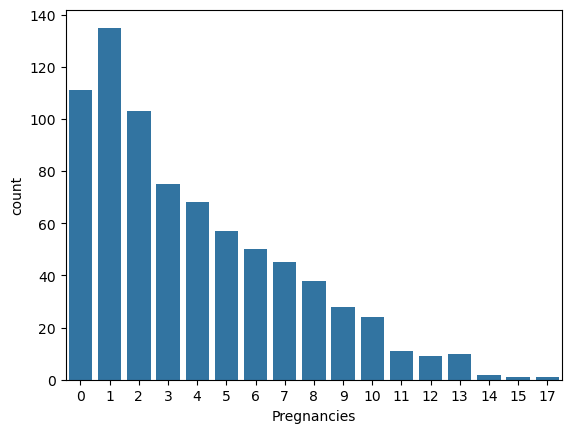

In [31]:
sns.countplot(x = df['Pregnancies'] , data = df)

<Axes: xlabel='Outcome', ylabel='count'>

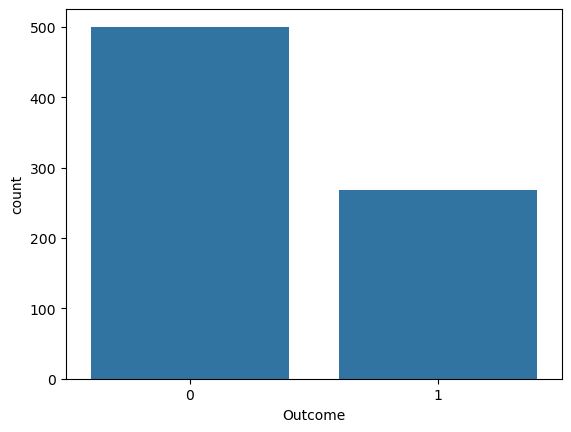

In [32]:
sns.countplot(x = df["Outcome"] , data = df)

In [33]:
df["Outcome"].value_counts(normalize = True)*100  # IT is a imbalanced dataset

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

**Imbalanced Data-** When One class has Significalntly more records than other , Model may become baised towards the class with more data points 

For Balancing this type of Dataset we Use 
1. Over-Sampling(SMOTE) - Add Data
2. Under-Sampling  - Substract data

**SMOTH TECHNIQUE(Synthatic Minority Oversampling Technique)**

In [35]:
from imblearn.over_sampling import SMOTE

In [37]:
x = df.iloc[: ,:8]
y = df["Outcome"]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [40]:
smoth = SMOTE(random_state = 42)
x,y = smoth.fit_resample(x,y)

In [45]:
x = pd.DataFrame(x)

In [48]:
type(x)
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6      148             72             35        0  33.600000   
1              1       85             66             29        0  26.600000   
2              8      183             64              0        0  23.300000   
3              1       89             66             23       94  28.100000   
4              0      137             40             35      168  43.100000   
..           ...      ...            ...            ...      ...        ...   
995            5      164             64              0        0  31.906102   
996            5      107             69             31        0  35.752773   
997            4      171             83             27      154  33.300000   
998            8      111             81             32      175  34.173097   
999            4      144             79             32        0  37.428351   

     DiabetesPedigreeFunction  Age  
0             

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.20 , random_state = 42 , stratify=y)

In [ ]:
log_clf = LogisticRegression()